In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
data=pd.read_csv("ex1data2.txt",names=["size","bedroom","price"])
data.head()

,size,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [59]:
def normalize(data):
    return (data-data.mean())/data.std()

In [60]:
data=normalize(data)

In [61]:

data.head()

,size,bedroom,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [62]:
data.insert(0,"ones",1)

In [63]:
data.head()

,ones,size,bedroom,price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [64]:
X=data.iloc[:,0:-1]

In [65]:
y=data.iloc[:,-1]

In [66]:
X=X.values
X.shape
y=y.values
y=y.reshape(47,1)

In [78]:
def costFunction(X,y,theta):
    inner=np.power(X@theta-y,2)
    return np.sum(inner)/(2*len(X))


In [80]:
theta=np.zeros((3,1))
theta.shape

(3, 1)

In [82]:
cost_int=costFunction(X,y,theta)
print(cost_int)

0.48936170212765967


In [84]:
def gradient_descent(X,y,theta,alpha,iters):
    costs=[]
    for i in range (iters):
        theta=theta-(X.T @(X@theta-y))*alpha/len(X)
        cost=costFunction(X,y,theta)
        costs.append(cost)
        if i %100==0:
            print(cost)
    return theta,costs

In [90]:
alphas=[0.0003,0.003,0.3,0.0001,0.01]
iters=2000


0.9755322703427683
0.9558137007620595
0.9376051860209375
0.9207800338379413
0.9052225036480321
0.8908268513169454
0.8774964574040106
0.8651430316606789
0.8536858870922168
0.8430512774941724
0.8331717929082424
0.8239858079285081
0.8154369782327777
0.8074737811186815
0.8000490961936326
0.7931198227048794
0.7866465303034761
0.7805931403166664
0.7749266348592747
0.7696167913483709
0.9736885480668048
0.8321609452812577
0.7640665236669438
0.7279308644956569
0.7065936948632622
0.6927392222131842
0.683087902287259
0.6760533914084844
0.6707884648523565
0.6667897214236401
0.6637286590780754
0.6613756587200359
0.6595630148739016
0.6581650640947052
0.6570863042881961
0.6562536036880454
0.6556107370199997
0.655114386974425
0.6547311447171548
0.6544352289496618
0.8116356171997179
0.6534324026953098
0.6534324026952099
0.6534324026952097
0.6534324026952097
0.6534324026952097
0.65343240269521
0.6534324026952097
0.65343240269521
0.6534324026952097
0.6534324026952097
0.6534324026952097
0.6534324026952097

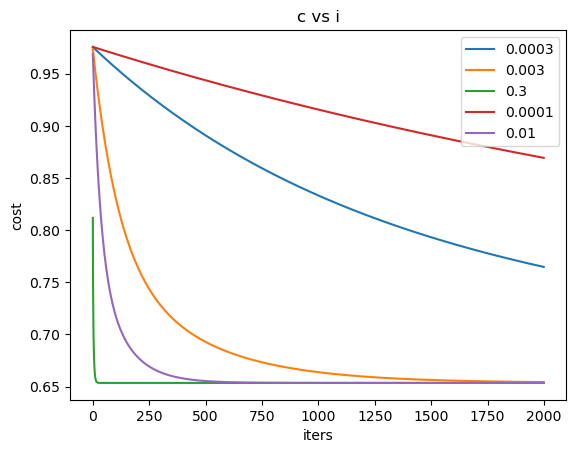

In [105]:
fig,ax=plt.subplots()#ax是示例
for alpha in alphas:
    _,costs=gradient_descent(X,y,theta,alpha,iters)
    ax.plot(np.arange(iters),costs,label=alpha)
    ax.legend()
ax.set(xlabel='iters',ylabel='cost',title='c vs i')
plt.show()